In [1025]:
import numpy as np
from scipy.stats import bernoulli
from scipy import sparse
import numpy.linalg as LA
import scipy.linalg as scipy_LA
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import time

In [2646]:
red = ['#E87E72', '#F8E3E1']
green = ['#86AC34', '#E6EED5']
blue = ['#56BCC2', '#D8F1F3']
purple = ['#BC7FF8', '#F1E5FE']

# GRBF with Normal densities (example 1)

In [1919]:
# 1-D RBF kernel
def RBF(x, y):
    return np.exp(-((x-y)**2)/(2))

In [1920]:
# function to simulate adjacency matrix with normal latent positions and RBF kernel
def simulate_A(n, sd):
    Z = np.random.normal(0, sd*n, n)
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            p = RBF(Z[i],Z[j])
            A[i,j] = bernoulli.rvs(p)
            A[j,i] = A[i,j]
    return A

In [ ]:
def fast_triangle_counter(A):
    A = sparse.csr_matrix(A)
    C = (A @ A).multiply(A)
    n_tri = C.sum() // 6
    return n_tri

In [1924]:
def calculate_Delta(n, sd):
    Z = np.random.normal(0, sd*n, n)
    P = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            P[i,j] = RBF(Z[i],Z[j])
            P[j,i] = P[i,j]
    P3 = LA.matrix_power(P, 3)
    triangles = P3.trace() // 6
    return triangles/n

In [1925]:
def average_Delta(n, sd, m=50):
    Deltas = np.zeros(m)
    for i in range(m):
        Deltas[i] = calculate_Delta(n, sd)
    Delta = Deltas.mean()
    return Delta

In [1792]:
def average_degree(n, sd, m=50):
    av_degree = np.zeros(m)
    for i in range(m):
        A = simulate_A(n,sd)
        av_degree[i] = np.sum(A, axis=0).mean()
    return av_degree.mean()

In [2093]:
# Code for producing histograms of average degree and triangle density 

start = time.time()

m = 100
n = 500
d = 2
sigma = 1
sd = 0.05

av_degrees_norm = np.zeros(m)
Deltas_norm = np.zeros(m)
for i in range(m):
    A = simulate_A(n,sd)
    av_degrees_norm[i] = np.sum(A, axis=0).mean()
    Deltas_norm[i] = fast_triangle_counter(A)/n

end = time.time()
print(end-start)

330.5396568775177


<IPython.core.display.Javascript object>


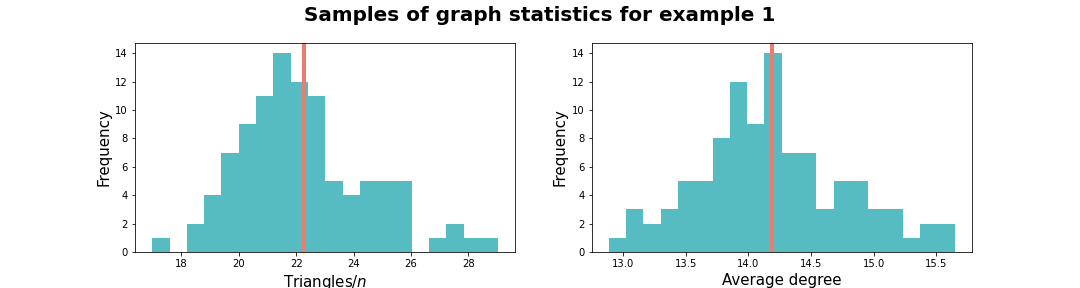

In [2844]:
# Plot histograms of average degree and triangle density 

fig = plt.figure()
fig.set_size_inches(15,4)
fig.suptitle(r'Samples of graph statistics for example 1', size=20, fontweight='bold')


ax1 = plt.subplot(1, 2, 1)
ax1.hist(Deltas_norm, color = blue[0], bins=20)
ax1.set_xlabel(r'Triangles/$n$', size=15)
ax1.set_ylabel('Frequency', size=15)
ax1.axvline(Deltas_norm.mean(), color=red[0], linewidth=4)

ax2 = plt.subplot(1,2,2)
ax2.hist(av_degrees_norm, color = blue[0], bins=20)
ax2.set_xlabel(r'Average degree', size=15)
ax2.set_ylabel('Frequency', size=15)
ax2.axvline(av_degrees_norm.mean(), color=red[0], linewidth=4)

plt.subplots_adjust(top=0.85)

#fig.savefig('example1_hists.png', bbox_inches='tight', dpi=400)

In [2665]:
# Code for plot to show constant average degree and triangle density for increasing n (Example 1)
start = time.time()

m = 50
ns = range(50,1050,50)
d = 2
sigma = 1
sd = 0.05

const_av_degrees_norm = np.zeros(len(ns))
const_av_degrees_j = np.zeros(m)
const_av_degrees_norm_std = np.zeros(len(ns))

const_Deltas_norm = np.zeros(len(ns))
const_Deltas_j = np.zeros(m)
const_Deltas_norm_std = np.zeros(len(ns))

for j in range(len(ns)):
    
    for i in range(m):
        A = simulate_A(ns[j],sd)
        const_av_degrees_j[i] = np.sum(A, axis=0).mean()
        const_Deltas_j[i] = fast_triangle_counter(A)/ns[j]   
    const_av_degrees_norm[j] = const_av_degrees_j.mean()
    const_av_degrees_norm_std[j] = const_av_degrees_j.std()
    const_Deltas_norm[j] = const_Deltas_j.mean()
    const_Deltas_norm_std[j] = const_Deltas_j.std()


end = time.time()
print(end-start)

5271.983673810959


In [2693]:
# Code for plot to show constant average degree and triangle density for increasing n (Example 2)

start = time.time()

m = 20
ns = range(50,1050,50)
d = 2
sigma = 1

const_av_degrees_sphere = np.zeros(len(ns))
const_av_degrees_j = np.zeros(m)
const_av_degrees_sphere_std = np.zeros(len(ns))

const_Deltas_sphere = np.zeros(len(ns))
const_Deltas_j = np.zeros(m)
const_Deltas_sphere_std = np.zeros(len(ns))

for j in range(len(ns)):
    for i in range(m):
        A = sphere_A(ns[j], d, sigma, ns[j]/50, RBF_vec)
        const_av_degrees_j[i] = np.sum(A, axis=0).mean()
        const_Deltas_j[i] = fast_triangle_counter(A)/ns[j]   
    const_av_degrees_sphere[j] = const_av_degrees_j.mean()
    const_av_degrees_sphere_std[j] = const_av_degrees_j.std()
    const_Deltas_sphere[j] = const_Deltas_j.mean()
    const_Deltas_sphere_std[j] = const_Deltas_j.std()

end = time.time()
print(end-start)

2409.399411201477


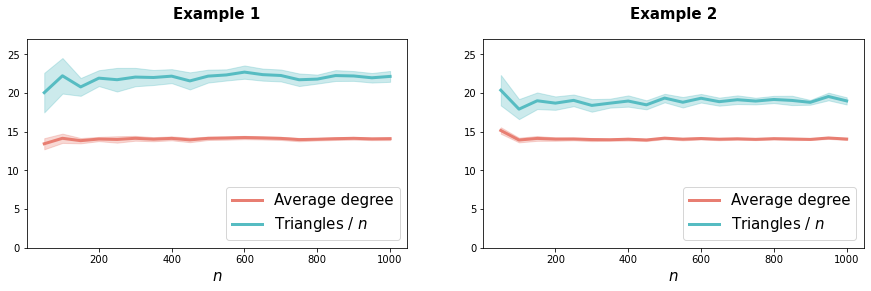

In [2694]:
# plot to show constant average degree and triangle density for increasing n 

fig = plt.figure()
fig.set_size_inches(15,4)

ax1 = plt.subplot(1, 2, 1)
ax1.plot(ns, const_av_degrees_norm, color=red[0], linewidth=3)
ax1.plot(ns, const_Deltas_norm, color=blue[0], linewidth=3)
ax1.set_xlabel(r'$n$', size=15)
ax1.legend([r'Average degree', r'Triangles / $n$'], fontsize=15, loc='lower right')
ax1.set_title('Example 1', size=15, fontweight='bold', pad=20)
ax1.set_ylim(0,27)
ax1.fill_between(ns, const_av_degrees_norm - 3*const_av_degrees_norm_std/np.sqrt(50), const_av_degrees_norm + 3*const_av_degrees_norm_std/np.sqrt(50), alpha=0.3, color=red[0])
ax1.fill_between(ns, const_Deltas_norm - 3*const_Deltas_norm_std/np.sqrt(50), const_Deltas_norm + 3*const_Deltas_norm_std/np.sqrt(50), alpha=0.3, color=blue[0])


ax2 = plt.subplot(1,2,2)
ax2.plot(ns, const_av_degrees_sphere, color=red[0], linewidth=3)
ax2.plot(ns, const_Deltas_sphere, color=blue[0], linewidth=3)
ax2.set_xlabel(r'$n$', size=15)
ax2.legend([r'Average degree', r'Triangles / $n$'], fontsize=15, loc='lower right')
ax2.set_title('Example 2', size=15, fontweight='bold', pad=20)
ax2.set_ylim(0,27)
ax2.fill_between(ns, const_av_degrees_sphere - 3*const_av_degrees_sphere_std/np.sqrt(20), const_av_degrees_sphere + 3*const_av_degrees_sphere_std/np.sqrt(20), alpha=0.3, color=red[0])
ax2.fill_between(ns, const_Deltas_sphere - 3*const_Deltas_sphere_std/np.sqrt(20), const_Deltas_sphere + 3*const_Deltas_sphere_std/np.sqrt(20), alpha=0.3, color=blue[0])

plt.subplots_adjust(top=0.85)

#fig.savefig('constant_example.png', bbox_inches='tight', dpi=400)

## Manifold figure (example 1)

In [2539]:
# Simulate a large number of Zs, sort, and generate P
N = 2000
Z_norm = np.random.normal(0, N/2000, N)
Z_norm = sorted(Z_norm)
P = np.zeros((N,N))
for i in range(N):
    for j in range(i):
        P[i,j] = RBF(Z_norm[i],Z_norm[j])
        P[j,i] = P[i,j]

In [2540]:
# Spectrally embed P into R^10
d = 10
w, v = LA.eigh(P)
idx = np.argsort(abs(w))[::-1]
w = w[idx]
v = v[:,idx]
I_pq = np.diag([1 if val>=0 else -1 for val in w])
X = v[:,0:d] @ np.diag(abs(w[0:d])**(1/2))

In [2542]:
X_star=X
# Get corresponding P
P_star = X_star @ I_pq[0:d,0:d] @ X_star.transpose()
P_star[P_star < 0] = 0
P_star[P_star > 1] = 1
# Simulate graph
A = bernoulli.rvs(P_star)
# Spectrally embed A int0 R^10
w, v = LA.eigh(A)
idx = np.argsort(abs(w))[::-1]
w = w[idx]
v = v[:,idx]
I_pq = np.diag([1 if val>=0 else -1 for val in w])
X_hat = v[:,0:d] @ np.diag(abs(w[0:d])**(1/2))

In [2544]:
# Procrustes code
def procrustes(X_hat, X_star):
    u, s, v = LA.svd(X_hat.transpose() @ X_star)
    T = u @ v.transpose()
    return X_star @ T.transpose()

X_star_p = procrustes(X_hat, X_star)

<IPython.core.display.Javascript object>


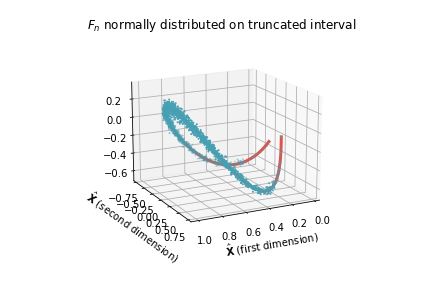

Text(0.5, 0.92, '$F_n$ normally distributed on truncated interval')

In [2545]:
# plot manifold with embeddings on top
from mpl_toolkits import mplot3d
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(X_star_p[:,0], X_star_p[:,1], X_star_p[:,2], linewidth=3, color=sns.color_palette('Spectral')[0])
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], marker='o', s=1, color=sns.color_palette('Spectral')[5])
plt.xlabel(r'$\hat{\mathbf{X}}$ (first dimension)')
plt.ylabel(r'$\hat{\mathbf{X}}$ (second dimension)')
ax.set_title(r'$F_n$ normally distributed on truncated interval')

# GRBF with uniform densities on $S^{1}$ (Example 2)

In [1979]:
# RBF kernel function for dimensions > 1
def RBF_vec(x, y, sigma):
    return np.exp(-LA.norm(x-y)**2/sigma**2)

In [1384]:
# function to sample points uniformly on the sphere 
def sample_spherical(npoints, ndim, radius):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    vec *= radius
    return vec

In [1385]:
# function to simulate adjacency matrix 
def sphere_A(n, d, sigma, radius, kernel):
    Z = sample_spherical(n, d, radius)
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            p = kernel(Z[:,i],Z[:,j], sigma)
            A[i,j] = bernoulli.rvs(p)
            A[j,i] = A[i,j]
    return A

In [1386]:
def average_degree_sphere(n, d, sigma, radius, kernel, m=50):
    av_degree = np.zeros(m)
    for i in range(m):
        A = sphere_A(n, d, sigma, radius, kernel)
        av_degree[i] = np.sum(A, axis=0).mean()
    return av_degree.mean()

In [1040]:
def calculate_Delta(n, d, sigma, radius, kernel):
    Z = sample_spherical(n, d, radius)
    P= np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            P[i,j] = kernel(Z[:,i],Z[:,j], sigma)
            P[j,i] = P[i,j]
    P3 = LA.matrix_power(P, 3)
    triangles = P3.trace() // 6
    return triangles/n

In [1041]:
def average_Delta(n, d, sigma, radius, kernel, m=200):
    Deltas = np.zeros(m)
    for i in range(m):
        Deltas[i] = calculate_Delta(n, d, sigma, radius, kernel)
    Delta = Deltas.mean()
    return Delta

In [2519]:
# Code for producing histograms of average degree and triangle density 

start = time.time()

m = 100
n = 100
d = 2
sigma = 1
radius = n/50

av_degrees = np.zeros(m)
Deltas = np.zeros(m)
for i in range(m):
    A = sphere_A(n, d, sigma, radius, RBF_vec)
    av_degrees[i] = np.sum(A, axis=0).mean()
    Deltas[i] = fast_triangle_counter(A)/n


end = time.time()
print(end-start)

22.828937768936157


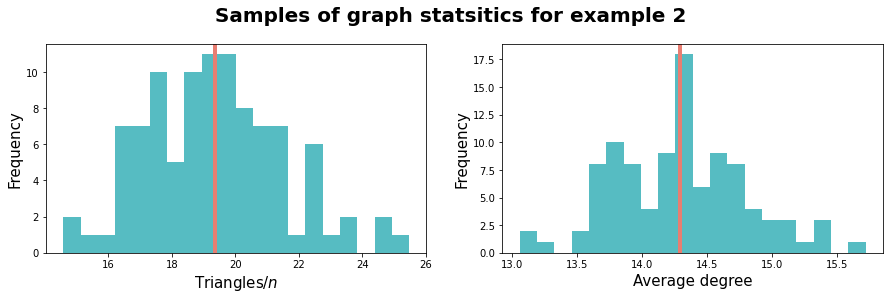

In [2655]:
# plot histograms of average degree and triangle density 
fig = plt.figure()
fig.set_size_inches(15,4)
fig.suptitle(r'Samples of graph statsitics for example 2', size=20, fontweight='bold')

ax1 = plt.subplot(1, 2, 1)
ax1.hist(Deltas, color = blue[0], bins=20)
ax1.set_xlabel(r'Triangles/$n$', size=15)
ax1.set_ylabel('Frequency', size=15)
ax1.axvline(Deltas.mean(), color=red[0], linewidth=4)

ax2 = plt.subplot(1,2,2)
ax2.hist(av_degrees, color = blue[0], bins=20)
ax2.set_xlabel(r'Average degree', size=15)
ax2.set_ylabel('Frequency', size=15)
ax2.axvline(av_degrees.mean(), color=red[0], linewidth=4)

plt.subplots_adjust(top=0.85)

fig.savefig('example2_hists.png', bbox_inches='tight', dpi=400)

# Uniform on $S^2(r_n)$ (Example 4)


In [2626]:
# Code for plot to show constant average degree and triangle density for increasing n 

start = time.time()

m = 20
ns = range(50,1050,50)
d = 3
sigma = 1

const_av_degrees_sphere_3d = np.zeros(len(ns))
const_av_degrees_j = np.zeros(m)
const_av_degrees_sphere_3d_std = np.zeros(len(ns))

const_Deltas_sphere_3d = np.zeros(len(ns))
const_Deltas_j = np.zeros(m)
const_Deltas_sphere_3d_std = np.zeros(len(ns))

for j in range(len(ns)):
    for i in range(m):
        A = sphere_A(ns[j], d, sigma, ns[j]**(1/2)/10, RBF_vec)
        const_av_degrees_j[i] = np.sum(A, axis=0).mean()
        const_Deltas_j[i] = fast_triangle_counter(A)/ns[j]   
    const_av_degrees_sphere_3d[j] = const_av_degrees_j.mean()
    const_av_degrees_sphere_3d_std[j] = const_av_degrees_j.std()
    const_Deltas_sphere_3d[j] = const_Deltas_j.mean()
    const_Deltas_sphere_3d_std[j] = const_Deltas_j.std()
    
end = time.time()
print(end-start)

2757.8492674827576


In [2441]:
# Code for producing histograms of average degree and triangle density 

start = time.time()

m = 100
n = 200
d = 3
sigma = 1
radius = n**(1/2)/10

av_degrees_sphere = np.zeros(m)
Deltas_sphere = np.zeros(m)
for i in range(m):
    A = sphere_A(n, d, sigma, radius, RBF_vec)
    av_degrees_sphere[i] = np.sum(A, axis=0).mean()
    Deltas_sphere[i] = fast_triangle_counter(A)/n

end = time.time()
print(end-start)

89.01013994216919


/tmp/ipykernel_410242/1070239398.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(top=0.85)


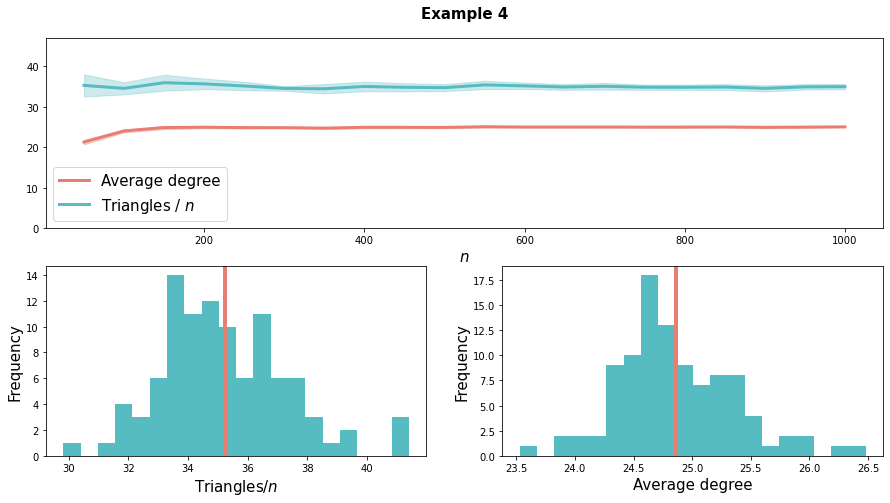

In [2696]:
# Example 4 figure
%matplotlib inline

fig = plt.figure(constrained_layout=True)
fig.set_size_inches(15,8)
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,:])
ax1.plot(ns, const_av_degrees_sphere_3d, color=red[0], linewidth=3)
ax1.plot(ns, const_Deltas_sphere_3d, color=blue[0], linewidth=3)
ax1.set_xlabel(r'$n$', size=15)
ax1.legend([r'Average degree', r'Triangles / $n$'], fontsize=15)
ax1.set_title('Example 4', size=15, fontweight='bold', pad=20)
ax1.set_ylim(0,47)
ax1.fill_between(ns, const_av_degrees_sphere_3d - 3*const_av_degrees_sphere_3d_std/np.sqrt(20), const_av_degrees_sphere_3d + 3*const_av_degrees_sphere_3d_std/np.sqrt(20), alpha=0.3, color=red[0])
ax1.fill_between(ns, const_Deltas_sphere_3d - 3*const_Deltas_sphere_3d_std/np.sqrt(20), const_Deltas_sphere_3d + 3*const_Deltas_sphere_3d_std/np.sqrt(20), alpha=0.3, color=blue[0])


ax2 = fig.add_subplot(gs[1,0])
ax2.hist(Deltas_sphere, color = blue[0], bins=20)
ax2.set_xlabel(r'Triangles/$n$', size=15)
ax2.axvline(Deltas_sphere.mean(), color=red[0], linewidth=4)
ax2.set_ylabel('Frequency', size=15)

ax3 = fig.add_subplot(gs[1,1])
ax3.hist(av_degrees_sphere, color = blue[0], bins=20)
ax3.set_xlabel(r'Average degree', size=15)
ax3.axvline(av_degrees_sphere.mean(), color=red[0], linewidth=4)
ax3.set_ylabel('Frequency', size=15)

plt.subplots_adjust(top=0.85)

fig.savefig('constant_example_4.png', bbox_inches='tight', dpi=400)

## Manifolds Figure (Examples 1 and 2)

In [2834]:
# Simulate a large number of Zs, sort, and generate P
N = 2000
r = N/2000
Z = np.random.uniform(-np.pi, np.pi, N)
Z = sorted(Z)
Y = np.array([r*np.sin(Z),r*np.cos(Z)])
P = np.zeros((N,N))
for i in range(N):
    for j in range(i):
        P[i,j] = RBF_vec(np.array([r*np.sin(Z[i]),r*np.cos(Z[i])]), np.array([r*np.sin(Z[j]),r*np.cos(Z[j])]), sigma=1)
        P[j,i] = P[i,j]

In [2835]:
# Compute pie slices
bins = 20
theta = np.linspace(-np.pi, np.pi, bins, endpoint=True)
width = theta[1] - theta[0]
heights = np.zeros(bins)
for i in range(bins-1):
    heights[i] = sum((theta[i] < np.array(Z)) & (np.array(Z)<= theta[i+1]))

colors = plt.cm.viridis(heights / max(heights))

ax = plt.subplot(projection='polar')
ax.bar(theta, heights, width=width, bottom=0.0)


<BarContainer object of 20 artists>

In [2340]:
# Spectrally embed P into R^10
w, v = LA.eigh(P)
idx = np.argsort(abs(w))[::-1]
w = w[idx]
v = v[:,idx]
I_pq = np.diag([1 if val>=0 else -1 for val in w])
X = v[:,0:d] @ np.diag(abs(w[0:d])**(1/2))

In [2341]:
d = 10
X = v[:,0:d] @ np.diag(abs(w[0:d])**(1/2))

In [2343]:
X_star = X

# Get corresponding P
P_star = X_star @ I_pq[0:d,0:d] @ X_star.transpose()
P_star[P_star < 0] = 0
P_star[P_star > 1] = 1

# Simulate graph
A = bernoulli.rvs(P_star)

# Spectrally embed A int0 R^10
w, v = LA.eigh(A)
idx = np.argsort(abs(w))[::-1]
w = w[idx]
v = v[:,idx]
I_pq = np.diag([1 if val>=0 else -1 for val in w])

d = 10
X_hat_circle = v[:,0:d] @ np.diag(abs(w[0:d])**(1/2))

In [2345]:
# Procrustes code
def procrustes(X_hat, X_star):
    u, s, v = LA.svd(X_hat.transpose() @ X_star)
    T = u @ v.transpose()
    return X_star @ T.transpose()

In [2346]:
X_star_p_circle = procrustes(X_hat_circle, X_star)

<IPython.core.display.Javascript object>


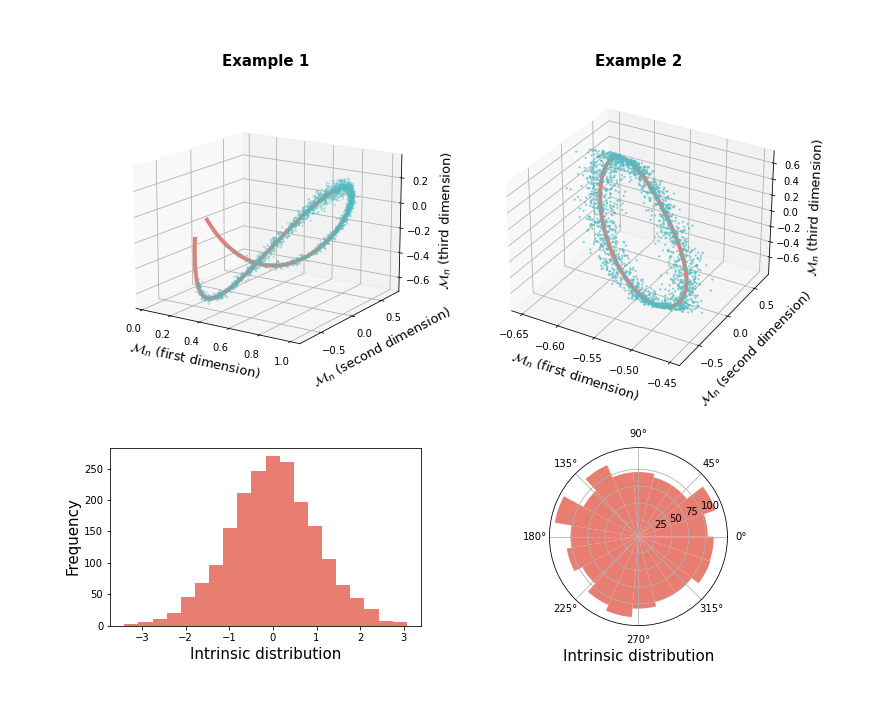

/tmp/ipykernel_410242/3538659743.py:39: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=1.1)


In [2836]:
from matplotlib import gridspec
%matplotlib notebook

fig = plt.figure(constrained_layout=True)
fig.set_size_inches(15,10)
gs = fig.add_gridspec(5,2)

ax1 = fig.add_subplot(gs[0:3,1], projection='3d')

ax1.scatter(X_hat_circle[:,0], X_hat_circle[:,1], X_hat_circle[:,2], marker='o', s=2, color=blue[0], alpha=0.5)
ax1.plot(X_star_p_circle[:,0], X_star_p_circle[:,1], X_star_p_circle[:,2], linewidth=4, color=red[0])
ax1.set_title('Example 2', fontweight="bold", pad=20, size=15)
ax1.set_xlabel(r'$\mathcal{M}_n$ (first dimension)', size=13,  labelpad=7)
ax1.set_ylabel(r'$\mathcal{M}_n$ (second dimension)', size=13,  labelpad=7)
ax1.set_zlabel(r'$\mathcal{M}_n$ (third dimension)', size=13, labelpad=7)
ax1.locator_params(axis='x', nbins=6)
ax1.locator_params(axis='y', nbins=4)

ax2 = fig.add_subplot(gs[0:3,0], projection='3d')
ax2.plot(X_star_p[:,0], X_star_p[:,1], X_star_p[:,2], linewidth=4, color=red[0])
ax2.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], marker='o', s=2, color=blue[0], alpha=0.3)
ax2.set_title('Example 1', fontweight="bold", pad=20, size=15)
ax2.set_xlabel(r'$\mathcal{M}_n$ (first dimension)', size=13,  labelpad=7)
ax2.set_ylabel(r'$\mathcal{M}_n$ (second dimension)', size=13,  labelpad=7)
ax2.set_zlabel(r'$\mathcal{M}_n$ (third dimension)', size=13, labelpad=7)
ax2.locator_params(axis='x', nbins=6)
ax2.locator_params(axis='y', nbins=5)

ax3 = fig.add_subplot(gs[3:,0])
ax3.hist(Z_norm, color=red[0], bins=20)
ax3.set_xlabel('Intrinsic distribution', size=15)
ax3.set_ylabel('Frequency', size=15)

ax4 = fig.add_subplot(gs[3:,1], projection='polar')
ax4.bar(theta, heights, width=width, bottom=0.0, color=red[0])
ax4.set_xlabel('Intrinsic distribution', size=15)
ax4.set_rticks([25,50,75,100])

plt.subplots_adjust(hspace=1.1)


In [2760]:
#fig.savefig('manifolds2.png', bbox_inches='tight', dpi=400)

# RBF on uniform interval (example 3)

In [2203]:
def simulate_A_unif(n, width):
    Z = np.random.uniform(0, width, n)
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            p = RBF(Z[i],Z[j])
            A[i,j] = bernoulli.rvs(p)
            A[j,i] = A[i,j]
    return A

In [2628]:
import time

start = time.time()

m = 20
ns = range(50,1050,50)

const_av_degrees_unif = np.zeros(len(ns))
const_av_degrees_j = np.zeros(m)
const_av_degrees_unif_std = np.zeros(len(ns))

const_Deltas_unif = np.zeros(len(ns))
const_Deltas_j = np.zeros(m)
const_Deltas_unif_std = np.zeros(len(ns))

for j in range(len(ns)):
    for i in range(m):
        A = simulate_A_unif(ns[j], ns[j]/10)
        const_av_degrees_j[i] = np.sum(A, axis=0).mean()
        const_Deltas_j[i] = fast_triangle_counter(A)/ns[j]   
    const_av_degrees_unif[j] = const_av_degrees_j.mean()
    const_av_degrees_unif_std[j] = const_av_degrees_j.std()
    const_Deltas_unif[j] = const_Deltas_j.mean()
    const_Deltas_unif_std[j] = const_Deltas_j.std()
    
end = time.time()
print(end-start)

2034.6531822681427


In [2208]:
import time

start = time.time()

m = 100
n = 500
width = n/10

av_degrees_unif = np.zeros(m)
Deltas_unif = np.zeros(m)
for i in range(m):
    A = simulate_A_unif(n,width)
    av_degrees_unif[i] = np.sum(A, axis=0).mean()
    Deltas_unif[i] = fast_triangle_counter(A)/n

end = time.time()
print(end-start)

361.5428955554962


/tmp/ipykernel_410242/990822787.py:30: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(top=0.85)


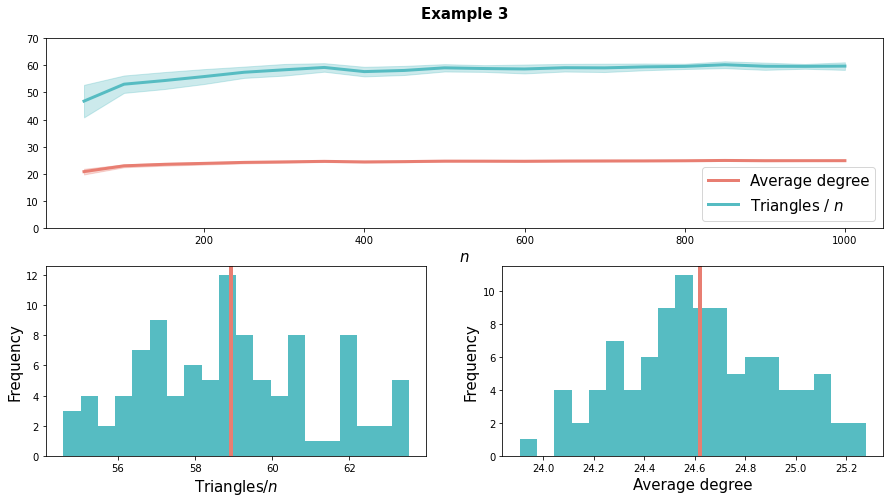

In [2697]:
%matplotlib inline

fig = plt.figure(constrained_layout=True)
fig.set_size_inches(15,8)
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0,:])
ax1.plot(ns, const_av_degrees_unif, color=red[0], linewidth=3)
ax1.plot(ns, const_Deltas_unif, color=blue[0], linewidth=3)
ax1.set_xlabel(r'$n$', size=15)
ax1.legend([r'Average degree', r'Triangles / $n$'], fontsize=15)
ax1.set_title('Example 3', size=15, fontweight='bold', pad=20)
ax1.set_ylim(0,70)
ax1.fill_between(ns, const_av_degrees_unif - 3*const_av_degrees_unif_std/np.sqrt(20), const_av_degrees_unif + 3*const_av_degrees_unif_std/np.sqrt(20), alpha=0.3, color=red[0])
ax1.fill_between(ns, const_Deltas_unif - 3*const_Deltas_unif_std/np.sqrt(20), const_Deltas_unif + 3*const_Deltas_unif_std/np.sqrt(20), alpha=0.3, color=blue[0])


ax2 = fig.add_subplot(gs[1,0])
ax2.hist(Deltas_unif, color = blue[0], bins=20)
ax2.set_xlabel(r'Triangles/$n$', size=15)
ax2.set_ylabel('Frequency', size=15)
ax2.axvline(Deltas_unif.mean(), color=red[0], linewidth=4)

ax3 = fig.add_subplot(gs[1,1])
ax3.hist(av_degrees_unif, color = blue[0], bins=20)
ax3.set_xlabel(r'Average degree', size=15)
ax3.set_ylabel('Frequency', size=15)
ax3.axvline(av_degrees_unif.mean(), color=red[0], linewidth=4)

plt.subplots_adjust(top=0.85)

fig.savefig('constant_example_3.png', bbox_inches='tight',dpi=400)

# Chanpuriya example

In [2698]:
def chan_k(x,y):
    return np.exp(x*y) / (1 + np.exp(x*y))

In [2762]:
# Simulate a large number of Zs, sort, and generate P
N = 2000
Z = np.random.uniform(-3, 3, N)
Z = sorted(Z)
P = np.zeros((N,N))
for i in range(N):
    for j in range(i):
        P[i,j] = chan_k(Z[i], Z[j])
        P[j,i] = P[i,j]

In [2763]:
# Spectrally embed P into R^10
w, v = LA.eigh(P)
idx = np.argsort(abs(w))[::-1]
w = w[idx]
v = v[:,idx]
I_pq = np.diag([1 if val>=0 else -1 for val in w])

d = 10
X = v[:,0:d] @ np.diag(abs(w[0:d])**(1/2))

In [2843]:
I_pq

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0, -1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0, -1]])

In [2764]:

# Get corresponding P
P_star = X @ I_pq[0:d,0:d] @ X.transpose()
P_star[P_star < 0] = 0
P_star[P_star > 1] = 1

# Simulate graph
A = bernoulli.rvs(P_star)

# Spectrally embed A int0 R^10
w, v = LA.eigh(A)
idx = np.argsort(abs(w))[::-1]
w = w[idx]
v = v[:,idx]
I_pq = np.diag([1 if val>=0 else -1 for val in w])

d = 10
X_hat_chan = v[:,0:d] @ np.diag(abs(w[0:d])**(1/2))

In [2765]:
X_star_p_chan = procrustes(X_hat_chan, X)

<IPython.core.display.Javascript object>


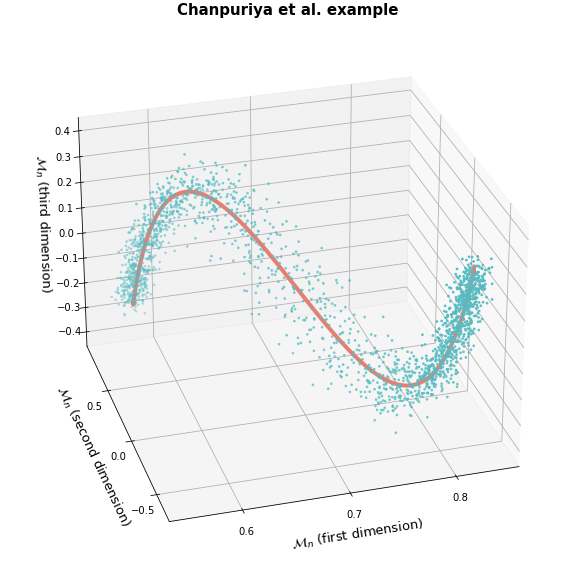

In [2841]:
%matplotlib notebook

fig = plt.figure(constrained_layout=True)
fig.set_size_inches(8,8)


ax1 = plt.axes(projection='3d')
ax1.scatter(X_hat_chan[:,0], X_hat_chan[:,1], X_hat_chan[:,2], marker='o', s=3, color=blue[0])
ax1.plot(X_star_p_chan[:,0], X_star_p_chan[:,1], X_star_p_chan[:,2], linewidth=4, color=red[0])
ax1.set_title('Chanpuriya et al. example', fontweight="bold", size=15)
ax1.set_xlabel(r'$\mathcal{M}_n$ (first dimension)', size=13,  labelpad=7)
ax1.set_ylabel(r'$\mathcal{M}_n$ (second dimension)', size=13,  labelpad=7)
ax1.set_zlabel(r'$\mathcal{M}_n$ (third dimension)', size=13, labelpad=7)
ax1.locator_params(axis='x', nbins=6)
ax1.locator_params(axis='y', nbins=4)



In [2842]:
#fig.savefig('chanpuriya.png', bbox_inches='tight', dpi=400)